In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1.

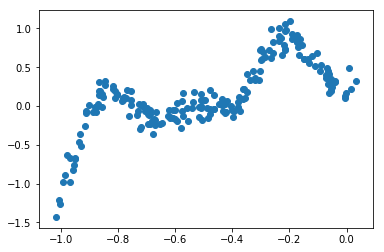

In [9]:
plt.scatter(x, y)

In [10]:
xx = np.linspace(min(x), max(x), num=200)

In [11]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)
# xx_data = xx.reshape(-1,1)

In [12]:
import mylibrary.nnlib as tnn

optimizer = tnn.Adam()
linear1 = tnn.LinearLayer(1, 1, optimizer=optimizer)

_______________________
epoch 0
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 10
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 20
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 30
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 40
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 50
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 60
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 70
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 80
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


___________



_______________________
epoch 750
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 760
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 770
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 780
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 790
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 800
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 810
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 820
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 830
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]



Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1500
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1510
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1520
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1530
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1540
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1550
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1560
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1570
Loss 0.04661188405078111
Weight 1 
 [[1.08361068]]
Biases 1 
 [0.67712169]


_______________________
epoch 1580
Loss 0.0466118840

TclError: this isn't a Tk application

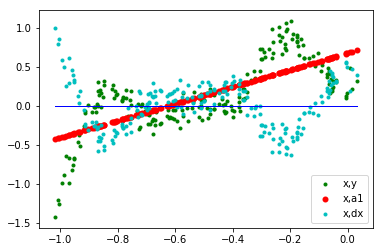

In [16]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = linear1.forward(x_data)
    loss = tnn.MseLoss.loss(a1, y_data)
    loss_del = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = linear1.backward(loss_del)
    
    linear1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, loss_del.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', linear1.weights)
        print("Biases 1", '\n', linear1.bias)
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

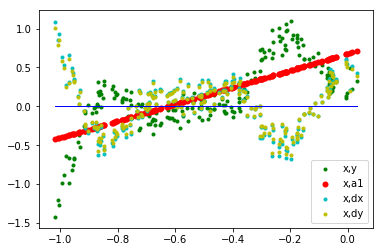

In [17]:
%matplotlib inline

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(x, loss_del.reshape(-1), marker='.', c='y', lw=1, label='x,dy')
plt.legend()

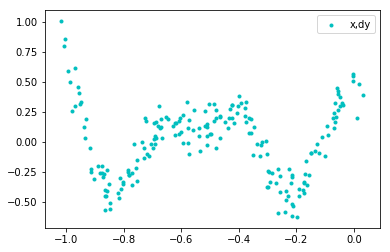

In [19]:
plt.scatter(x, loss_del.reshape(-1), marker='.', c='c', lw=1, label='x,dy')
plt.legend()

In [ ]:
'''
use at least the number of inputs or output as a linear only function in a network.
This keeps in the error of the non linear parts of the function like zeros of relu under control.
    - The residual/gradient is not uniform though; they are mis-scaled.
'''

In [20]:
hidden_size = 3

layer1a = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

In [1]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    
    a1a = layer1a.forward(x_data)
    a2a = layer2a.forward(a1a)
    
#     a1l = linear1.forward(x_data - a2a)
    
    lossa = tnn.MseLoss.loss(a2a, loss_del)
    loss_dela = tnn.MseLoss.del_loss(a2a, loss_del)
    
    da1 = layer2a.backward(loss_dela)
    dxa = layer1a.backward(da1)
    
    layer1a.update()
    layer2a.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, loss_del.reshape(-1), marker='.', c='g', lw=1, label='x, dy')
        plt.scatter(x, a2a.reshape(-1), marker='.', c='r', lw=3, label='x,a2a')
        plt.scatter(x, loss_dela.reshape(-1), marker='.', c='c', lw=1, label='x,dya')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
        plt.legend()
        
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(a1a.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
        fig.canvas.draw()
        
        plt.pause(0.01)
#         print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

NameError: name 'plt' is not defined

In [27]:
print("Weight 1", '\n', layer1a.weights)
print("Biases 1", '\n', layer1a.bias)
print("Weight 2", '\n', layer2a.weights)
print("Biases 2", '\n', layer2a.bias)

Weight 1 
 [[ 2.24059854 -2.24439368 -4.12816874]]
Biases 1 
 [ 0.45014597 -0.57398688 -1.52799702]
Weight 2 
 [[ 2.07246712]
 [ 2.29461136]
 [-1.33090105]]
Biases 2 
 [-0.43374251]


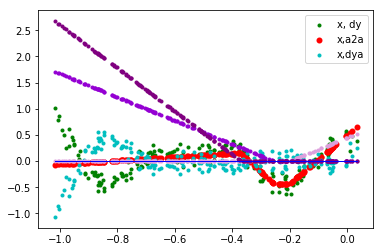

In [28]:
% matplotlib inline
plt.scatter(x, loss_del.reshape(-1), marker='.', c='g', lw=1, label='x, dy')
plt.scatter(x, a2a.reshape(-1), marker='.', c='r', lw=3, label='x,a2a')
plt.scatter(x, loss_dela.reshape(-1), marker='.', c='c', lw=1, label='x,dya')

colors = ['plum', 'darkviolet', 'purple', 'indigo']
for i, out in enumerate(a1a.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.legend()

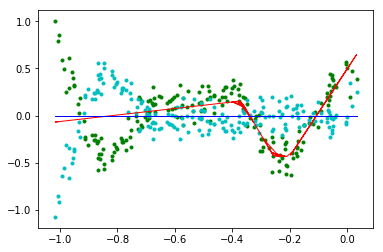

In [34]:
plt.scatter(x, loss_del.reshape(-1), marker='.', c='g', lw=1, label='x, dy')
plt.scatter(x, loss_dela.reshape(-1), marker='.', c='c', lw=1, label='x,dya')
plt.plot(x, a2a.reshape(-1), c='r', lw=1, label='x,a2a')
plt.plot(x, np.zeros_like(x), c='b', lw=1)

In [ ]:
'''
Here we observe that the residual for the non-linear(relu) MLP is not properly scaled.
There seems to be some error due to combinational backward gradient.
- Here the output produced by the points near -0.5 all output 0s. 
  Therefore the residual comes as 0s due to backpropagation formula.
  
We can calculate appropriate residual to make furthur error reduction network.

Solution:
1. Use residual in the [del_loss] for adding a new MLP(x --> del_y) to accomodate the error: [ignores input residual directly]
    This equivalently adds new hidden units to the existing network
2. Use equivalent piecewise network to calculate the exact residual.(Zeros doesnt hamper the residual here)
    a. Formulate linearly independent neural network: error is caused by only one neuron. Hence, the residual is known well
    b. Use target propagation for using delta rule.
'''

In [66]:
# when residual and original network is combined parallely

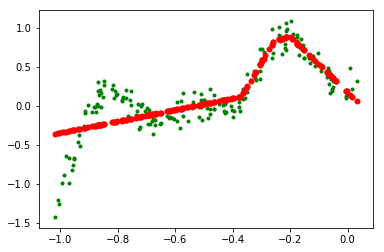

In [36]:
a1a = layer1a.forward(x_data)
a2a = layer2a.forward(a1a)
a1l = linear1.forward(x_data)
yout = a1l - a2a

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,a1l')